In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
ewa=pd.read_excel("EastWestAirlines.xlsx",'data')

In [4]:
ewa.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
ewa.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
ewa.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
ewa.shape

(3999, 12)

In [9]:
ewa.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
ewa.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
ewa.duplicated().value_counts()

False    3999
dtype: int64

In [13]:
ewa1=ewa.drop('ID#',axis=1)
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [63]:
stdscaler=StandardScaler()
ewascaler=stdscaler.fit_transform(ewa1)
ewascaler=pd.DataFrame(ewascaler,columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])
ewascaler.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [64]:
Dm=DBSCAN(eps=0.8,min_samples=6)
Dm.fit(ewascaler)

DBSCAN(eps=0.8, min_samples=6)

In [65]:
y_DB=Dm.fit_predict(ewascaler)
y_DB

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
ewac=pd.DataFrame(y_DB,columns=['clusters'])
ewac.head()

,clusters
0,0
1,0
2,0
3,0
4,-1


In [67]:
ewa['clusters']=ewac
ewa['clusters'].head()

0    0
1    0
2    0
3    0
4   -1
Name: clusters, dtype: int64

In [68]:
ewa['clusters'].value_counts()

 0    2216
 1     944
-1     820
 2      12
 3       7
Name: clusters, dtype: int64

In [69]:
ewa[ewa['clusters']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3976,59927,739,1,1,1,3100,3,0,0,1464,1,-1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,-1
3956,3979,47301,1005,1,1,1,4561,4,0,0,1464,0,-1
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [70]:
ewa[ewa['clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [71]:
ewa[ewa['clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [72]:
ewa[ewa['clusters']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,2
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,2
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,2
1976,1993,11961,0,1,2,1,11961,10,0,0,4646,0,2
2317,2335,10458,0,1,2,1,10458,12,0,0,3726,0,2
2421,2440,41062,0,1,2,1,8275,11,0,0,3356,0,2
2741,2763,42970,0,1,2,1,7889,14,0,0,2256,0,2
2906,2928,17769,0,1,2,1,5165,10,0,0,1807,0,2
3155,3177,21736,0,1,2,1,6672,10,0,0,2544,0,2
3191,3213,56624,0,1,2,1,12311,14,0,0,2491,0,2


In [73]:
ewa[ewa['clusters']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
3569,3592,48607,0,3,1,1,18284,37,0,0,1339,0,3
3601,3624,74093,0,3,1,1,20055,37,0,0,949,0,3
3619,3642,46207,0,3,1,1,16093,32,0,0,1130,0,3
3860,3883,35650,0,3,1,1,23130,34,0,0,1640,0,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,3
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,3
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,3


In [74]:
ewa[ewa['clusters']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


In [75]:
ewa[ewa['clusters']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


In [76]:
ewa.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1744.781707,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878
1,0,2185.088899,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000
2,1,1830.398305,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000
3,2,2477.833333,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000
4,3,3822.142857,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

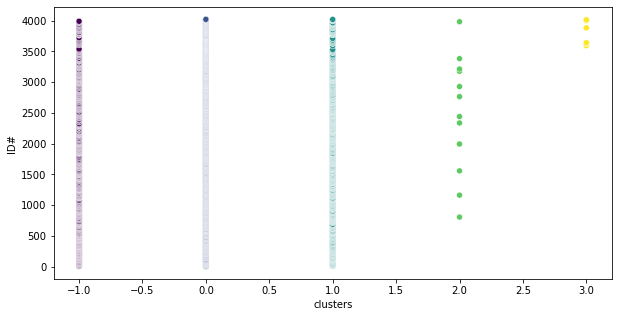

In [79]:
plt.figure(figsize=(10,5))
sn.scatterplot(ewa['clusters'],ewa['ID#'],c=Dm.labels_)
plt.show